## Welcome to the 2nd Module of Ultimate Pandas Guide
---
#### Visit the 1st Module by clicking the links below: -
1. Module 1 Github [Repository](https://github.com/Siddharth1047/Ultimate-Pandas-Guide/tree/main).
2. Module 1 Medium [Blog](https://medium.com/@siddharthgov01/ultimate-pandas-guide-module-1-910edf54935).
---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the titanic dataset from the seaborn library
titanic = sns.load_dataset("titanic")
# Load the dataset in a Pandas dataframe
df = pd.DataFrame(titanic)

In [3]:
# Preview the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
# Now we'll check the dataset for null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### There are some null values in "*age*" column and in "*embark_town*" column.
#### But there are many null values in the column "*deck*".
---
#### Let's drop the "*deck*" column from our dataset. 

In [6]:
df.drop("deck", axis = 1, inplace = True)

#### "inplace = True" is used when you want to make permanent changes to the dataset.

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#### As we can see, the "*deck*" column has been deleted or dropped successfully.
---
#### Now we'll fill the other null values with appropriate data.

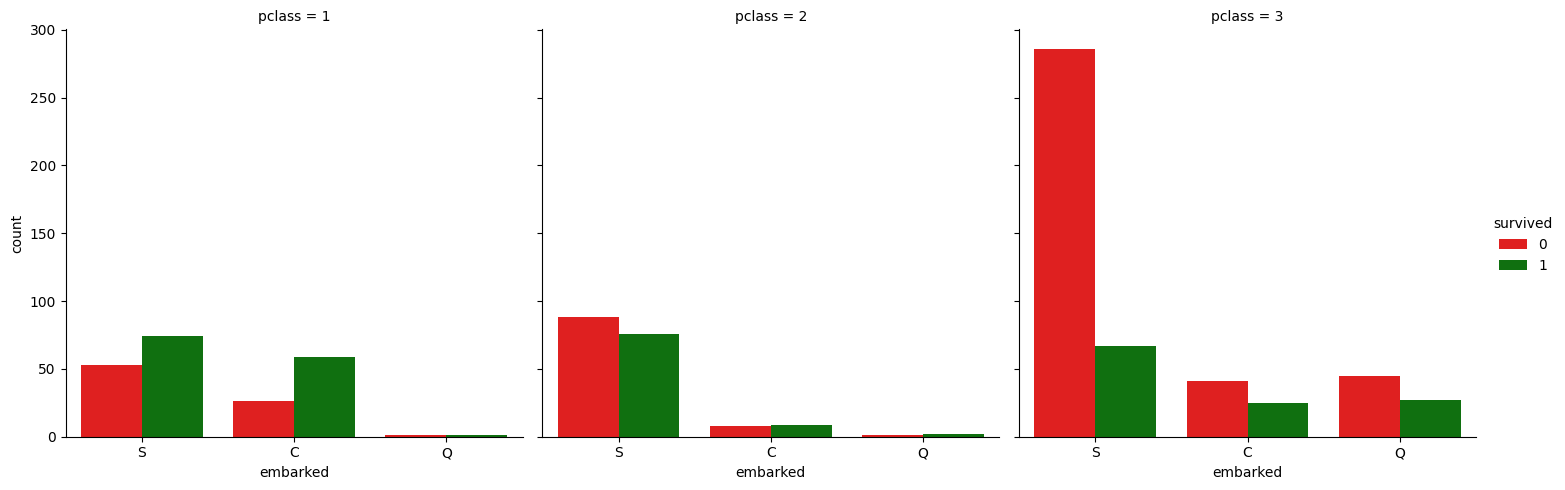

In [8]:
# Let's visualize something
# In embarked column C = Cherbourg, France; Q = Queenstown (now called Cobh), Ireland ; S = Southampton, England
my_palette = {0: "red", 1: "green"}
sns.catplot(x = "embarked", hue = "survived", kind = "count", col = "pclass", data = df, palette = my_palette)
plt.show()

#### Observations: - 
1. As we can see majority of people were from "S: Southampton, England"
2. So, we'll replace the 2 null values from the "*embarked*" column with the values "S".

In [9]:
df["embarked"].fillna("S", inplace = True)

In [10]:
# Now for the "age" column we'll fill the null values with Mean of all the other values
mean_age = df["age"].mean()
df["age"].fillna(mean_age, inplace=True)

#### For median you can use the below code: -
##### median_age = df["age"].median()
##### df["age"].fillna(median_age, inplace=True)
---

In [11]:
# Now let us check again
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

#### As we can see there are no null values present.
#### Assignment - Remove null values from column "*embark_town*". 
---

In [12]:
# Now I want to get all the rows where "emabarked == Q"
mask = df["embarked"] == 'Q'
df[mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
16,0,3,male,2.000000,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
22,1,3,female,15.000000,0,0,8.0292,Q,Third,child,False,Queenstown,yes,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,Queenstown,yes,True
32,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,29.699118,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
825,0,3,male,29.699118,0,0,6.9500,Q,Third,man,True,Queenstown,no,True
828,1,3,male,29.699118,0,0,7.7500,Q,Third,man,True,Queenstown,yes,True
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False


In [13]:
# Median of dataset
df_median = df.median()
print("Median is: ")
print(df_median)

Median is: 
survived       0.000000
pclass         3.000000
age           29.699118
sibsp          0.000000
parch          0.000000
fare          14.454200
adult_male     1.000000
alone          1.000000
dtype: float64


<ipython-input-13-dabf094157db>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median = df.median()


In [14]:
# Mean of dataset
df_mean = df.mean()
print("Mean is: ")
print(df_mean)

Mean is: 
survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64


<ipython-input-14-f89ef324aec4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = df.mean()


In [15]:
# Standard deviation of dataset
df_std = df.std()
print("Standard Deviation is: ")
print(df_std)

Standard Deviation is: 
survived       0.486592
pclass         0.836071
age           13.002015
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64


<ipython-input-15-e6534377dc73>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


In [16]:
# As we saw in the previous visualization, majority of the passengers were from "S"
# But what if I don't want to use visualization, but I want to find how many people were from "S".
def get_number_of_pass(embarked):
  maskk = df['embarked'] == embarked
  return df[maskk].shape[0]

In [17]:
get_number_of_pass('S')

646

#### There were 646 people from "S: Southampton"
---

<Axes: ylabel='Frequency'>

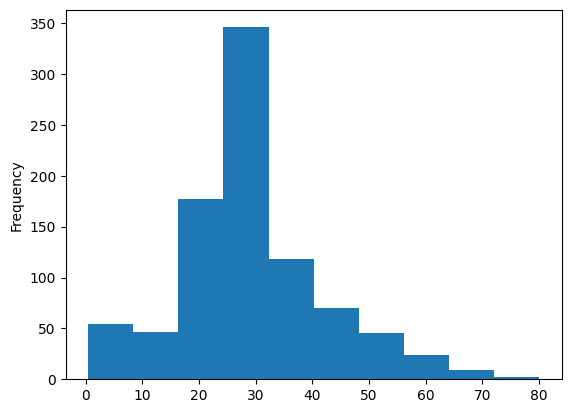

In [18]:
# You can also use Pandas to plot graphs, but I think Matplotlib & Seaborn are better
df['age'].plot(kind='hist')

---
## One-Hot Encoding

In [19]:
# Create a copy of our original dataframe
df_one = df.copy()
# Lets perform One-Hot Encoding on the "embarked" column
one_hot_encoded = pd.get_dummies(df_one['embark_town'])
# Now lets concatenate with our new dataframe
df_encoded = pd.concat([df_one, one_hot_encoded], axis = 1)
# Preview it
df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0,0,1


#### As we can see, we've converted our "*embarked*" column from categorical to quantitative.
---
## Label Encoding

In [20]:
# Lets convert the column "alone" from categorical to quantitative.
# NOTE: - Column "alone" contains binary data (i.e. true or false)
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder
LE = LabelEncoder()
# Lets encode
encoded_labels = LE.fit_transform(df_one['alone'])
# Replace the original column values with the encoded ones
df_one['alone'] = encoded_labels
# Preview the changes
df_one.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,1


##### Changes were --> *False == 0 & True == 1*
---
## Outlier Detection
1. Visualize outliers using boxplot
2. Find outliers using IQR(Inter-Quartile Range)
3. To know more about IQR [Visit](https://en.wikipedia.org/wiki/Interquartile_range).

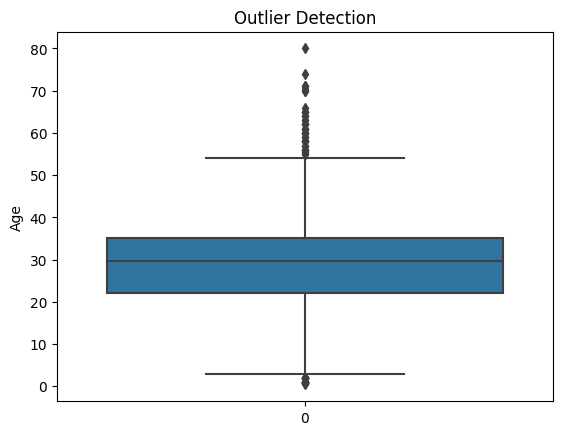

In [32]:
# Visualice outliers in column "age"
sns.boxplot(data = df['age'])
plt.title("Outlier Detection")
plt.ylabel("Age")
plt.show()

In [22]:
# Performing IQR & finding which rows contain the outliers
column = 'age'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
# Print outliers
print(f"Outliers in the column {column} are: ")
print(outliers)

Outliers in the column age are: 
7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64


In [23]:
# Remove the outliers
df_no_outliers = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
original_shape = df.shape
no_outliers_shape = df_no_outliers.shape
# Print the shape
print(f"Original shape of dataset was: {original_shape}\n")
print(f"Shape after removing the outliers is: {no_outliers_shape}")

Original shape of dataset was: (891, 14)

Shape after removing the outliers is: (825, 14)


#### There is another method for detecting outliers called as "Z-Score" method.
#### Maybe we'll see that method in Module 3.
---
## Some other useful Pandas features: - 

In [25]:
# Value counts returns the total number of unique values in a column
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [26]:
# This feature allows you to create a spreadsheet like Pivot Table
pd.pivot_table(df, values='age', index='sex', columns='pclass', aggfunc='mean')

pclass,1,2,3
sex,,,
female,34.141405,28.748661,24.068493
male,39.287717,30.653908,27.372153


In [29]:
# Query allows you to perform SQL-like queries on the dataframe
female_passengers = df.query("sex == 'female'")
female_passengers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [30]:
# Apply is used to transform or manipulate data according to the requirements
df['fare_double'] = df['fare'].apply(lambda x: x * 2)

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_double
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,14.5000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,142.5666
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,15.8500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,106.2000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,16.1000


#### New column "*fare_double*" was created, which is double the value of "*fare*" column.
---
# **THANK YOU FOR FOLLOWING ALONG**